In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_data = pd.read_csv('covid.csv')

In [58]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [11]:
covid_data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [13]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
# Convert 'Date' column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

In [17]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [23]:
covid_data.duplicated().sum()

0

In [60]:
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [7]:
if 'Province/State' in covid_data.columns:
    covid_data['Province/State'] = covid_data['Province/State'].fillna(method='bfill')
else:
    print("Column 'Province/State' does not exist in the DataFrame.")


In [9]:
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Australian Capital Territory,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Australian Capital Territory,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Australian Capital Territory,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Australian Capital Territory,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Australian Capital Territory,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [78]:
covid_data.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

## Descriptive Analysis

In [11]:
# Grouping by 'Country/Region' and summing the 'Confirmed' and 'Deaths' columns
country_summary = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum()
country_summary.head()


,Confirmed,Deaths
Country/Region,,
Afghanistan,1936390,49098
Albania,196702,5708
Algeria,1179755,77972
Andorra,94404,5423
Angola,22662,1078


## Trend Analysis

In [13]:
# Select top 3 countries for analysis
top_countries = country_summary.index
trend_data = covid_data[covid_data['Country/Region'].isin(top_countries)]
trend_summary = trend_data.groupby(['Date', 'Country/Region'])[['Confirmed', 'Deaths']].sum().reset_index()
trend_summary


,Date,Country/Region,Confirmed,Deaths
0,2020-01-22,Afghanistan,0,0
1,2020-01-22,Albania,0,0
2,2020-01-22,Algeria,0,0
3,2020-01-22,Andorra,0,0
4,2020-01-22,Angola,0,0
...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78
35152,2020-07-27,Western Sahara,10,1
35153,2020-07-27,Yemen,1691,483
35154,2020-07-27,Zambia,4552,140


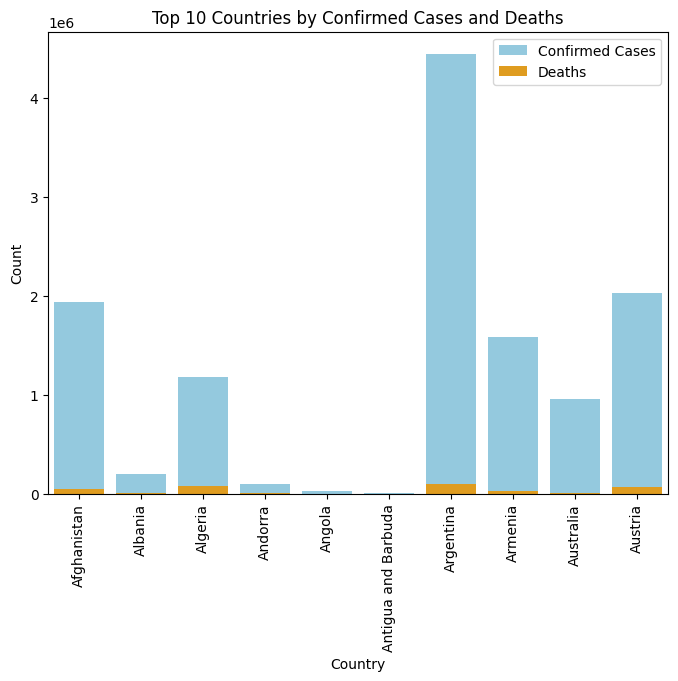

In [118]:
top_countries = country_summary.head(10)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_countries.index, y=top_countries['Confirmed'], color='skyblue', label='Confirmed Cases')

# Overlay a bar plot for Deaths
sns.barplot(x=top_countries.index, y=top_countries['Deaths'], color='orange', label='Deaths')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Confirmed Cases and Deaths')
plt.xticks(rotation=90)

# Adding a legend
plt.legend()

# Show the plot
plt.show()


In [134]:
# Add population data
population_data = {'US': 331002651, 'Brazil': 212559417, 'Russia': 145934462}
country_summary['Population'] = country_summary.index.map(population_data)

# Calculate cases per 1,000 people
country_summary['Cases_per_1000'] = (country_summary['Confirmed'] / country_summary['Population']) * 1000
print(country_summary[['Confirmed', 'Population', 'Cases_per_1000']].head(30))


                        Confirmed   Population  Cases_per_1000
Country/Region                                                
Afghanistan               1936390          NaN             NaN
Albania                    196702          NaN             NaN
Algeria                   1179755          NaN             NaN
Andorra                     94404          NaN             NaN
Angola                      22662          NaN             NaN
Antigua and Barbuda          4487          NaN             NaN
Argentina                 4450658          NaN             NaN
Armenia                   1587173          NaN             NaN
Australia                  960247          NaN             NaN
Austria                   2034986          NaN             NaN
Azerbaijan                1134717          NaN             NaN
Bahamas                     12100          NaN             NaN
Bahrain                   1755206          NaN             NaN
Bangladesh                8754729          NaN         

## Comparative Analysis

In [139]:
covid_data.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Australian Capital Territory,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Australian Capital Territory,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Australian Capital Territory,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Australian Capital Territory,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Australian Capital Territory,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


###  Country-wise comparison: Highest and Lowest Confirmed Cases and Deaths

In [175]:
highest_confirmed = country_summary['Confirmed'].idxmax()
lowest_confirmed = country_summary['Confirmed'].idxmin()


highest_deaths = country_summary['Deaths'].idxmax()
lowest_deaths = country_summary['Deaths'].idxmin()

print(f"Country with the highest confirmed cases: {highest_confirmed} with {country_summary.loc[highest_confirmed, 'Confirmed']} cases")
print(f"Country with the lowest confirmed cases: {lowest_confirmed} with {country_summary.loc[lowest_confirmed, 'Confirmed']} cases")
print(f"Country with the highest deaths: {highest_deaths} with {country_summary.loc[highest_deaths, 'Deaths']} deaths")
print(f"Country with the lowest deaths: {lowest_deaths} with {country_summary.loc[lowest_deaths, 'Deaths']} deaths")

Country with the highest confirmed cases: US with 224345948 cases
Country with the lowest confirmed cases: Western Sahara with 901 cases
Country with the highest deaths: US with 11011411 deaths
Country with the lowest deaths: Bhutan with 0 deaths


### Testing & Positivity Rates:

In [181]:

if 'Tests' in covid_data.columns:
    # Calculate the correlation between Tests and Confirmed cases
    correlation_tests_confirmed = covid_data[['Tests', 'Confirmed']].corr().loc['Tests', 'Confirmed']
    
    # Calculate the Positivity Rate (Confirmed / Tests)
    covid_data['Positivity_Rate'] = covid_data['Confirmed'] / covid_data['Tests']
    
    # Calculate the correlation between Tests and Positivity Rate
    correlation_tests_positivity = covid_data[['Tests', 'Positivity_Rate']].corr().loc['Tests', 'Positivity_Rate']
    
    # Output the correlations
    print(f"Correlation between Tests and Confirmed cases: {correlation_tests_confirmed}")
    print(f"Correlation between Tests and Positivity Rate: {correlation_tests_positivity}")
else:
    print("Tests data is not available in the dataset.")


Tests data is not available in the dataset.


### Recovery vs. Death Rate:

In [186]:
country_summary['Recovery_Rate'] = (covid_data.groupby('Country/Region')['Recovered'].sum() / country_summary['Confirmed']) * 100
country_summary['Death_Rate'] = (country_summary['Deaths'] / country_summary['Confirmed']) * 100

print(country_summary[['Recovery_Rate', 'Death_Rate']])


                    Recovery_Rate  Death_Rate
Country/Region                               
Afghanistan             41.223101    2.535543
Albania                 60.435074    2.901852
Algeria                 64.072371    6.609169
Andorra                 73.168510    5.744460
Angola                  29.004501    4.756862
...                           ...         ...
West Bank and Gaza      26.181675    0.586822
Western Sahara          71.920089    6.992231
Yemen                   35.395951   26.357547
Zambia                  64.603890    2.042172
Zimbabwe                24.032366    1.734457

[187 rows x 2 columns]


## Predictive Modeling

### Prediction of Future Cases

In [27]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Assuming 'covid_data' contains 'Date', 'Country/Region', and 'Confirmed' columns

# Convert 'Date' column to datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Filter the data for the USA and set the Date column as the index
us_data = covid_data[covid_data['Country/Region'] == 'US'].groupby('Date')['Confirmed'].sum()
us_data = us_data.sort_index()

# Split data into training and testing sets
train_data = us_data.iloc[:-30]  # Use all data except the last 30 days for training
test_data = us_data.iloc[-30:]   # Use the last 30 days for testing

# Train the Exponential Smoothing model
model = ExponentialSmoothing(train_data, trend='add').fit()

# Make a forecast for the next 30 days
forecast = model.forecast(30)
forecast



2020-06-28    2.553029e+06
2020-06-29    2.595786e+06
2020-06-30    2.638543e+06
2020-07-01    2.681300e+06
2020-07-02    2.724057e+06
2020-07-03    2.766814e+06
2020-07-04    2.809572e+06
2020-07-05    2.852329e+06
2020-07-06    2.895086e+06
2020-07-07    2.937843e+06
2020-07-08    2.980600e+06
2020-07-09    3.023357e+06
2020-07-10    3.066114e+06
2020-07-11    3.108872e+06
2020-07-12    3.151629e+06
2020-07-13    3.194386e+06
2020-07-14    3.237143e+06
2020-07-15    3.279900e+06
2020-07-16    3.322657e+06
2020-07-17    3.365414e+06
2020-07-18    3.408172e+06
2020-07-19    3.450929e+06
2020-07-20    3.493686e+06
2020-07-21    3.536443e+06
2020-07-22    3.579200e+06
2020-07-23    3.621957e+06
2020-07-24    3.664714e+06
2020-07-25    3.707472e+06
2020-07-26    3.750229e+06
2020-07-27    3.792986e+06
Freq: D, dtype: float64

### Prediction of Deaths

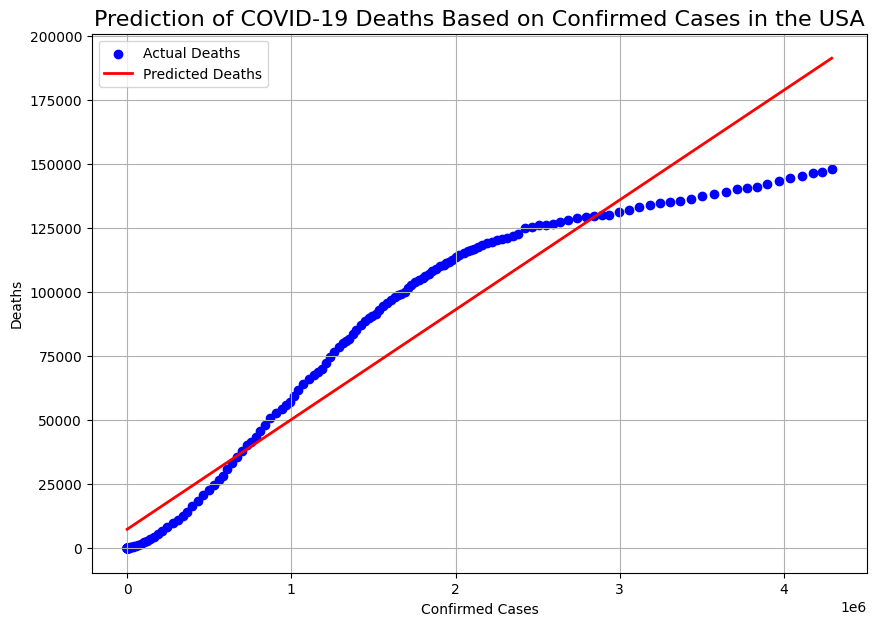

Regression Coefficients: [0.04288657]
Intercept: 7393.527273180742


In [214]:

usa_data = covid_data[covid_data['Country/Region'] == 'US']

# Prepare the data for regression
X = usa_data[['Confirmed']]  # Features (Confirmed cases)
y = usa_data['Deaths']       # Target variable (Deaths)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the actual vs predicted deaths
plt.figure(figsize=(10, 7))
plt.scatter(X, y, color='blue', label='Actual Deaths')
plt.plot(X, predictions, color='red', label='Predicted Deaths', linewidth=2)

# Customize the plot
plt.title('Prediction of COVID-19 Deaths Based on Confirmed Cases in the USA', fontsize=16)
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Print model coefficients
print(f"Regression Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


## Impact of Vaccination

In [217]:
0
if 'Vaccination Rate' in covid_data.columns:
    # Filter data for a specific country (e.g., USA)
    country_data = covid_data[covid_data['Country/Region'] == 'US']

    # Calculate correlation between vaccination rate and confirmed cases
    correlation_vaccination_cases = country_data[['Vaccination Rate', 'Confirmed']].corr().loc['Vaccination Rate', 'Confirmed']
    
    # Calculate correlation between vaccination rate and deaths
    correlation_vaccination_deaths = country_data[['Vaccination Rate', 'Deaths']].corr().loc['Vaccination Rate', 'Deaths']
    
    # Print the correlations
    print(f"Correlation between Vaccination Rate and Confirmed cases: {correlation_vaccination_cases}")
    print(f"Correlation between Vaccination Rate and Deaths: {correlation_vaccination_deaths}")
    
    # Optionally, plot the relationships
    plt.figure(figsize=(12, 6))
    
    # Plot vaccination rate vs confirmed cases
    plt.subplot(1, 2, 1)
    plt.scatter(country_data['Vaccination Rate'], country_data['Confirmed'], color='blue', alpha=0.5)
    plt.title('Vaccination Rate vs Confirmed Cases')
    plt.xlabel('Vaccination Rate (%)')
    plt.ylabel('Confirmed Cases')
    
    # Plot vaccination rate vs deaths
    plt.subplot(1, 2, 2)
    plt.scatter(country_data['Vaccination Rate'], country_data['Deaths'], color='red', alpha=0.5)
    plt.title('Vaccination Rate vs Deaths')
    plt.xlabel('Vaccination Rate (%)')
    plt.ylabel('Deaths')
    
    plt.tight_layout()
    plt.show()
else:
    print("Vaccination rate data is not available in the dataset.")


Vaccination rate data is not available in the dataset.


### Machine Learning Model

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         8
         Low       1.00      1.00      1.00        19
      Medium       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



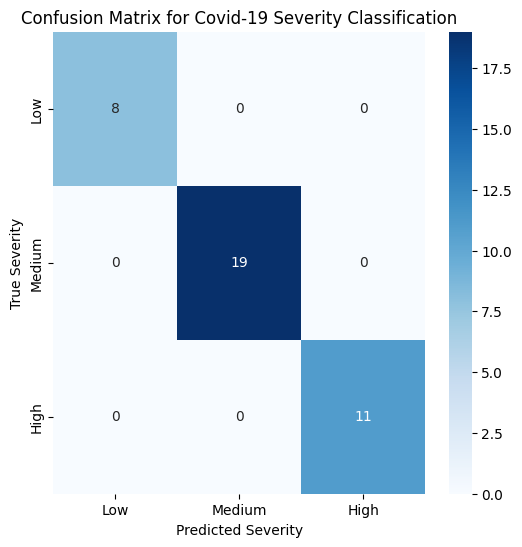

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def classify_severity(row):
    if row['Confirmed'] > 5000000:
        return 'High'
    elif row['Confirmed'] > 1000000:
        return 'Medium'
    else:
        return 'Low'

# Apply the classification function to create the target variable
country_summary['Severity'] = country_summary.apply(classify_severity, axis=1)

# Features for classification (Confirmed, Deaths, Population)
X = country_summary[['Confirmed', 'Deaths', 'Population']]

# Target variable (Severity)
y = country_summary['Severity']

# Handle missing values by imputing them with the median (you can also drop NaNs if needed)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features (important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix for Covid-19 Severity Classification')
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.show()


## Correlation and Causality

### Correlation between Cases & Deaths

In [226]:
# Calculate the Pearson correlation coefficient between Confirmed cases and Deaths across countries
correlation_confirmed_deaths = country_summary[['Confirmed', 'Deaths']].corr().loc['Confirmed', 'Deaths']

# Output the correlation coefficient
print(f"Pearson correlation coefficient between Confirmed cases and Deaths: {correlation_confirmed_deaths}")


Pearson correlation coefficient between Confirmed cases and Deaths: 0.9256469644699576


### Effect of Social Distancing or Lockdown

In [17]:
import scipy.stats as stats

# Define the lockdown date (for example, March 25, 2020, in India)
lockdown_date = '2020-03-25'

# Filter data for a specific country (e.g., India)
country_data = covid_data[covid_data['Country/Region'] == 'India']

# Convert 'Date' column to datetime if it's not already
country_data['Date'] = pd.to_datetime(country_data['Date'])

# Split data into pre-lockdown and post-lockdown
pre_lockdown = country_data[country_data['Date'] < lockdown_date]['Confirmed']
post_lockdown = country_data[country_data['Date'] >= lockdown_date]['Confirmed']

# Perform a t-test to check if there is a significant difference between pre and post lockdown cases
t_stat, p_value = stats.ttest_ind(pre_lockdown, post_lockdown)

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a significant change in the number of confirmed cases before and after the lockdown.")
else:
    print("There is no significant change in the number of confirmed cases before and after the lockdown.")


T-statistic: -6.6182
P-value: 0.0000
There is a significant change in the number of confirmed cases before and after the lockdown.


### Heatmap for Geographical Spread

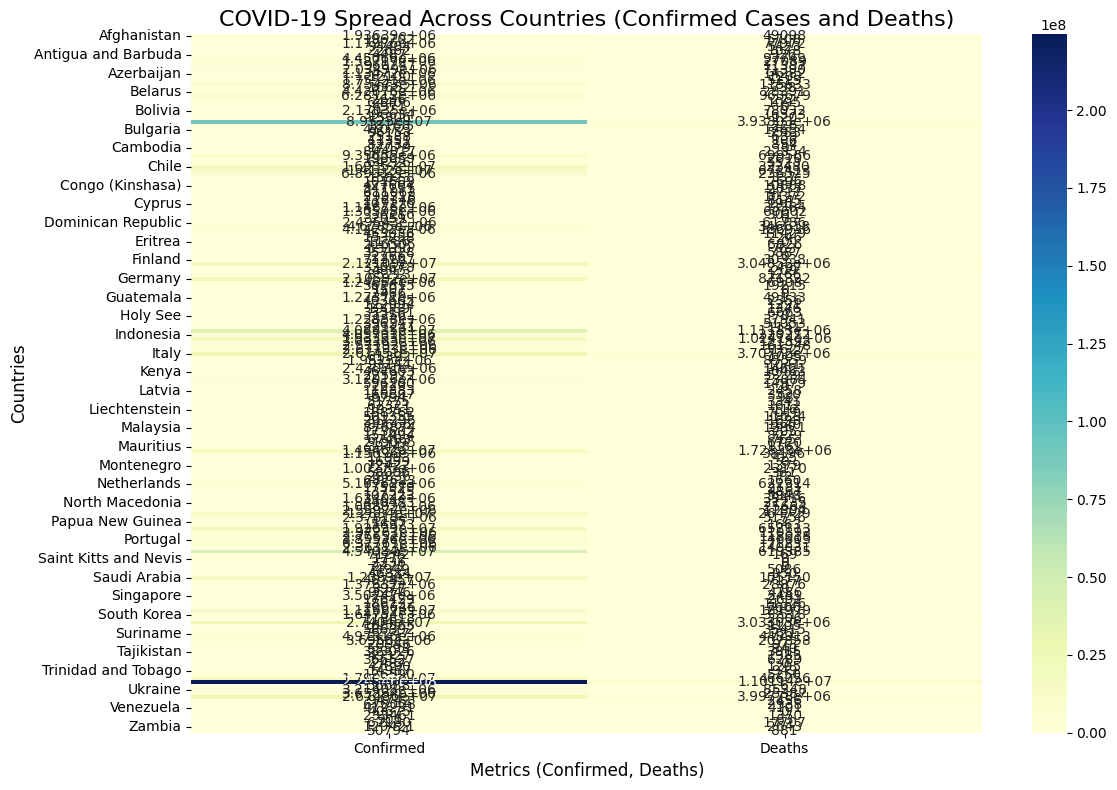

In [245]:

heatmap_data = country_summary[['Confirmed', 'Deaths']]

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar=True)

# Customize the plot
plt.title('COVID-19 Spread Across Countries (Confirmed Cases and Deaths)', fontsize=16)
plt.xlabel('Metrics (Confirmed, Deaths)', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()


### Line Charts for Trends

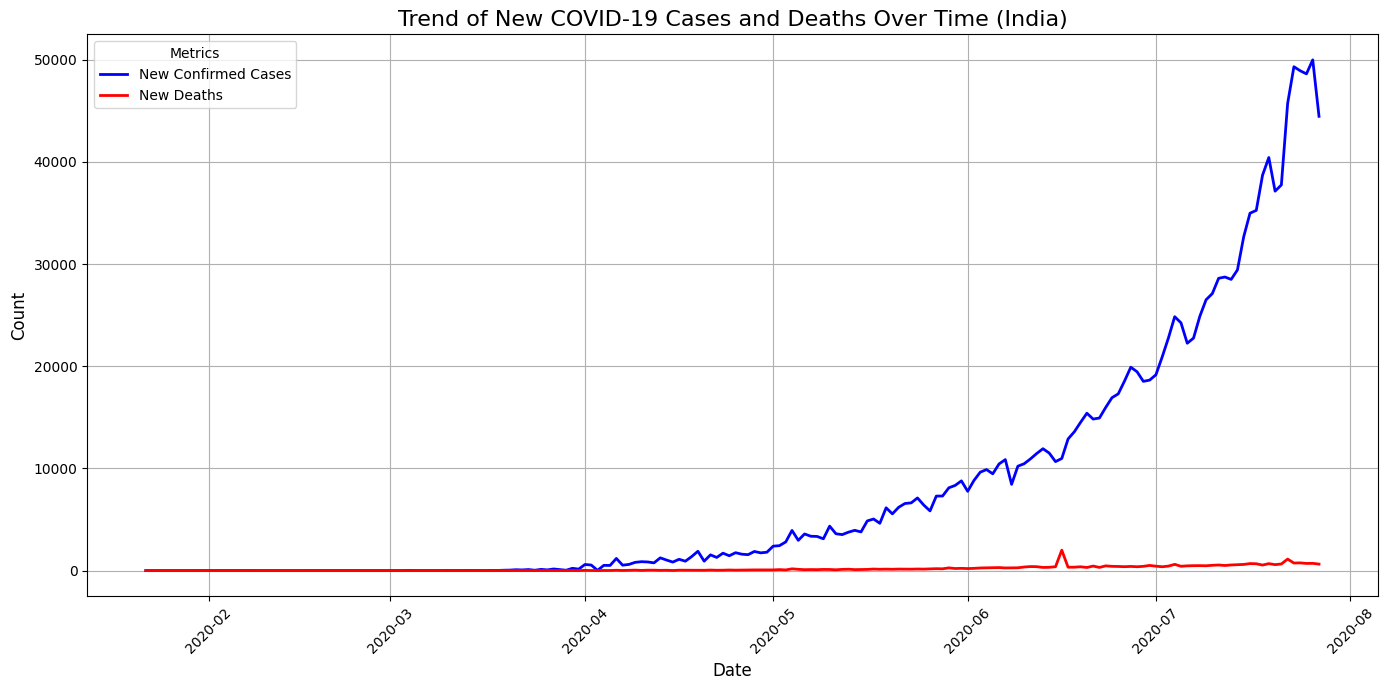

In [19]:


# Filter the data for a specific country (e.g., India)
country_data = covid_data[covid_data['Country/Region'] == 'India']

# Ensure the 'Date' column is in datetime format
country_data['Date'] = pd.to_datetime(country_data['Date'])

# Sort data by date to ensure chronological order
country_data = country_data.sort_values('Date')

# Calculate new confirmed cases and new deaths
country_data['New_Confirmed'] = country_data['Confirmed'].diff().fillna(0)
country_data['New_Deaths'] = country_data['Deaths'].diff().fillna(0)

# Plot the trends of new confirmed cases and new deaths over time
plt.figure(figsize=(14, 7))

# Plotting new confirmed cases
sns.lineplot(data=country_data, x='Date', y='New_Confirmed', label='New Confirmed Cases', color='blue', linewidth=2)

# Plotting new deaths
sns.lineplot(data=country_data, x='Date', y='New_Deaths', label='New Deaths', color='red', linewidth=2)

# Customize the plot
plt.title('Trend of New COVID-19 Cases and Deaths Over Time (India)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Metrics')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [258]:
# Check the column names in country_summary to identify the exact column name for recovery data
print(country_summary.columns)



Index(['Confirmed', 'Deaths', 'Population', 'Cases_per_1000', 'Recovery_Rate',
       'Death_Rate', 'Severity'],
      dtype='object')


### Bar Charts

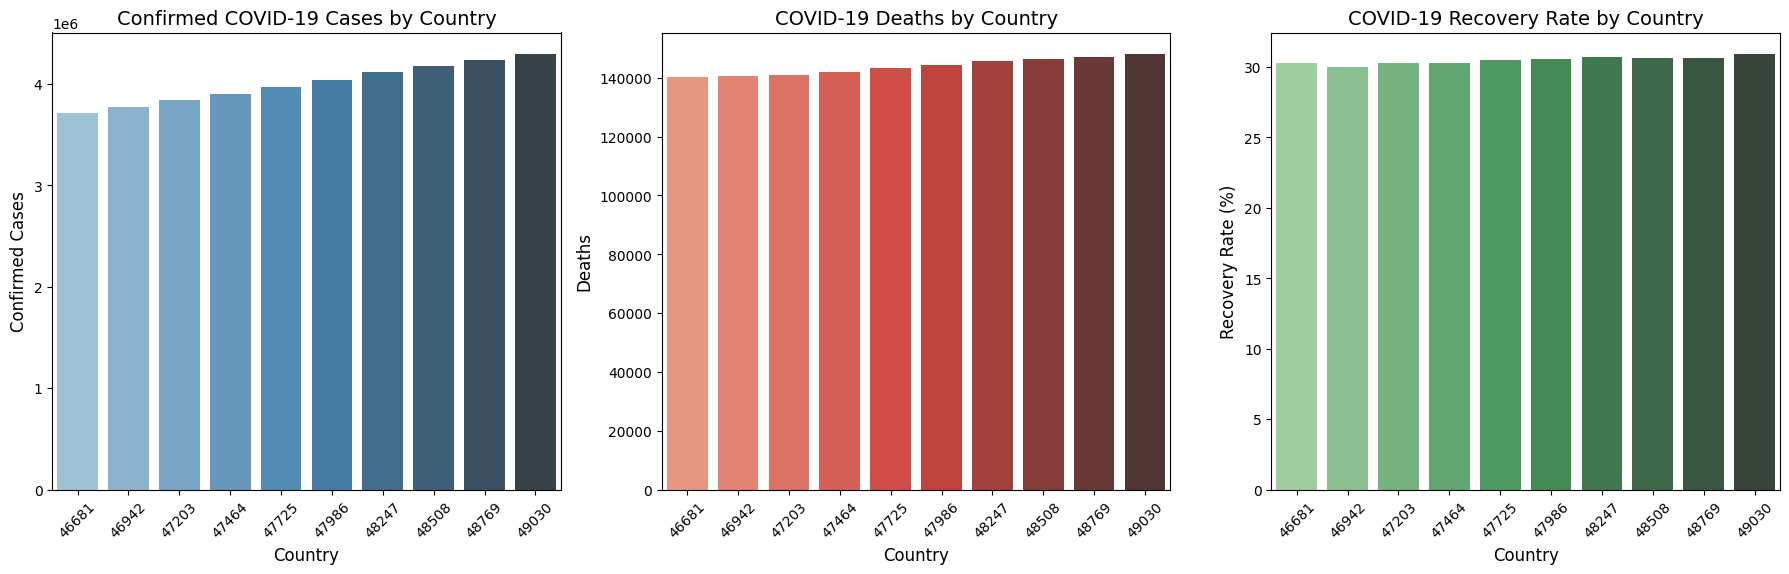

In [21]:

if 'Recovered' in covid_data.columns:
    covid_data['Recovery_Rate'] = (covid_data['Recovered'] / covid_data['Confirmed']) * 100

    # Select top 10 countries based on Confirmed cases for comparison
    top_countries = covid_data.sort_values('Confirmed', ascending=False).head(10)

    # Create a figure with subplots for each metric (Confirmed, Deaths, and Recovery Rate)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Bar chart for Confirmed cases
    sns.barplot(x=top_countries.index, y=top_countries['Confirmed'], ax=axes[0], palette='Blues_d')
    axes[0].set_title('Confirmed COVID-19 Cases by Country', fontsize=14)
    axes[0].set_xlabel('Country', fontsize=12)
    axes[0].set_ylabel('Confirmed Cases', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)

    # Bar chart for Deaths
    sns.barplot(x=top_countries.index, y=top_countries['Deaths'], ax=axes[1], palette='Reds_d')
    axes[1].set_title('COVID-19 Deaths by Country', fontsize=14)
    axes[1].set_xlabel('Country', fontsize=12)
    axes[1].set_ylabel('Deaths', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)

    # Bar chart for Recovery Rates
    sns.barplot(x=top_countries.index, y=top_countries['Recovery_Rate'], ax=axes[2], palette='Greens_d')
    axes[2].set_title('COVID-19 Recovery Rate by Country', fontsize=14)
    axes[2].set_xlabel('Country', fontsize=12)
    axes[2].set_ylabel('Recovery Rate (%)', fontsize=12)
    axes[2].tick_params(axis='x', rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

else:
    print("The 'Recovered' column is missing or has a different name.")


## Pie Chart for Cases Distribution

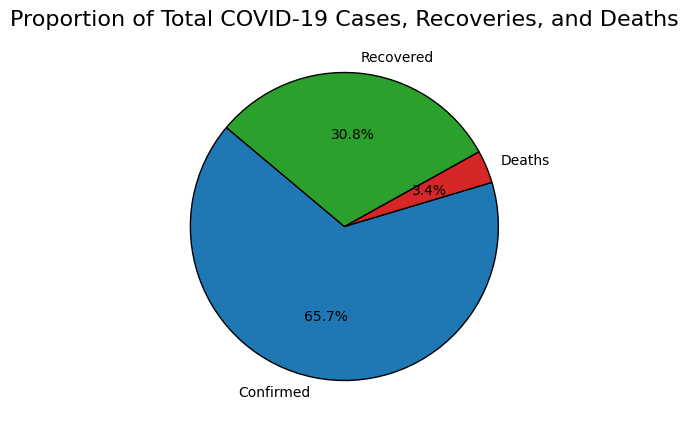

In [279]:

total_cases = covid_data['Confirmed'].sum()
total_deaths = covid_data['Deaths'].sum()
total_recoveries = covid_data['Recovered'].sum()

# Prepare data for the pie chart
labels = ['Confirmed', 'Deaths', 'Recovered']
sizes = [total_cases, total_deaths, total_recoveries]
colors = ['#1f77b4', '#d62728', '#2ca02c'] 

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Total COVID-19 Cases, Recoveries, and Deaths', fontsize=16)

# Show the plot
plt.show()


## Advanced Analysis

### Clustering of Countries

Inertia (score) on training data: 24132.259135884327


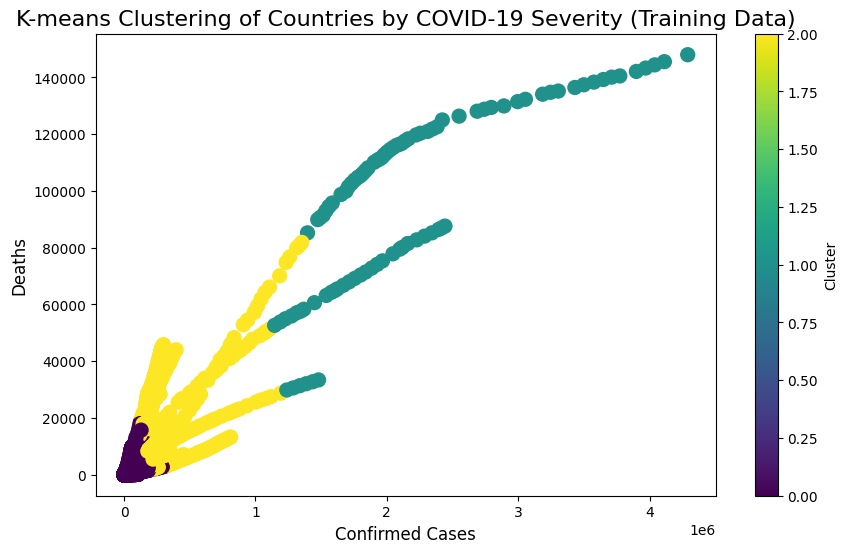

Cluster Centers (Centroids):
[[-0.09270341 -0.10831021 -0.0994802 ]
 [17.29584763 15.58899208 15.37466712]
 [ 2.32866732  3.235115    2.85369351]]


In [295]:

features = covid_data[['Confirmed', 'Deaths', 'Recovered']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)       # Only transform the test data

# Apply K-means clustering to the training data (you can adjust the number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(X_train_scaled)  # Fit on training data

# Predict clusters for both training and test sets
train_labels = kmeans.predict(X_train_scaled)
test_labels = kmeans.predict(X_test_scaled)

# Calculate the inertia (score) for the clustering
print(f"Inertia (score) on training data: {kmeans.inertia_}")

# Visualize the clusters on the training data (using Confirmed vs Deaths for 2D visualization)
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Confirmed'], X_train['Deaths'], c=train_labels, cmap='viridis', s=100)

# Adding labels and title
plt.title('K-means Clustering of Countries by COVID-19 Severity (Training Data)', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Deaths', fontsize=12)

# Add a legend to show the cluster labels
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

# Display the cluster centers (centroids)
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)



## Descriptive Analysis

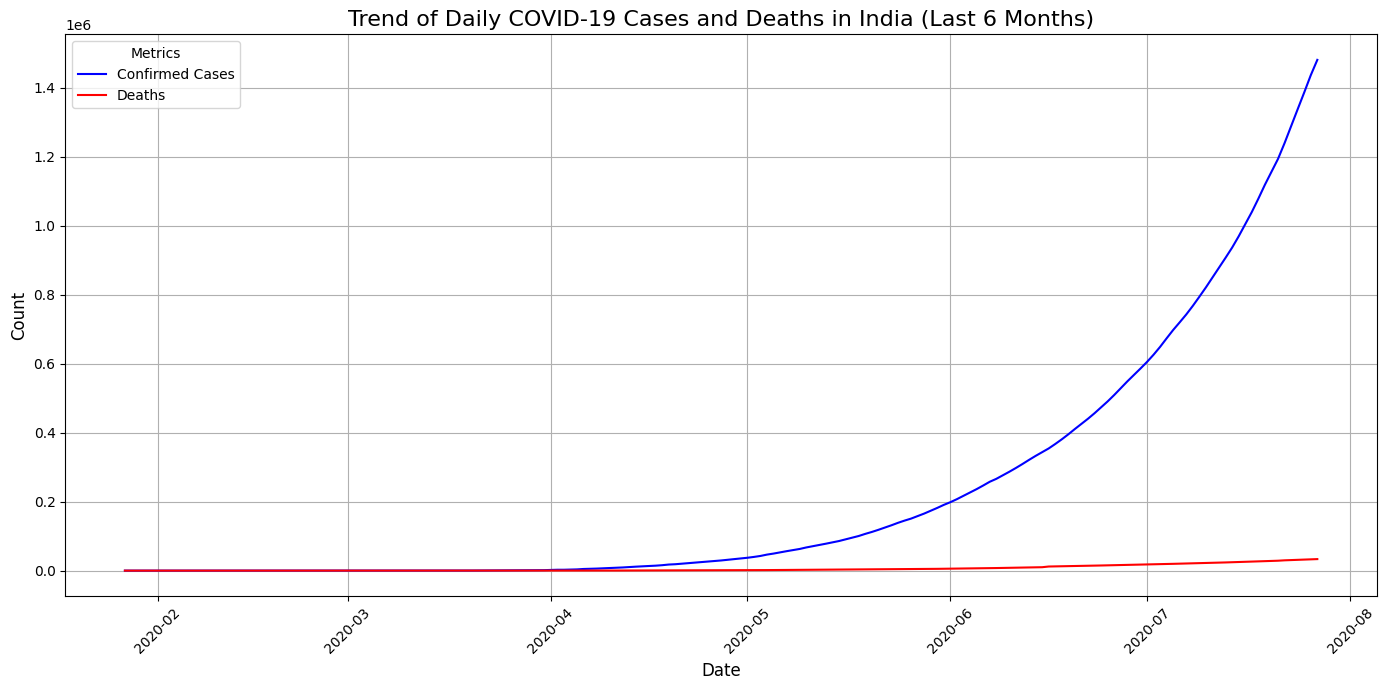

In [311]:

india_data = covid_data[covid_data['Country/Region'] == 'India']

# Get the last 6 months of data
last_6_months = india_data[india_data['Date'] >= (india_data['Date'].max() - pd.DateOffset(months=6))]

# Aggregate daily Confirmed cases and Deaths
daily_data = last_6_months.groupby('Date')[['Confirmed', 'Deaths']].sum().reset_index()

# Plot the trend of daily confirmed cases and deaths over the last 6 months
plt.figure(figsize=(14, 7))

# Plotting confirmed cases
sns.lineplot(data=daily_data, x='Date', y='Confirmed', label='Confirmed Cases', color='blue')

# Plotting deaths
sns.lineplot(data=daily_data, x='Date', y='Deaths', label='Deaths', color='red')

# Customizing the plot
plt.title('Trend of Daily COVID-19 Cases and Deaths in India (Last 6 Months)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Metrics')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Predictive Modeling

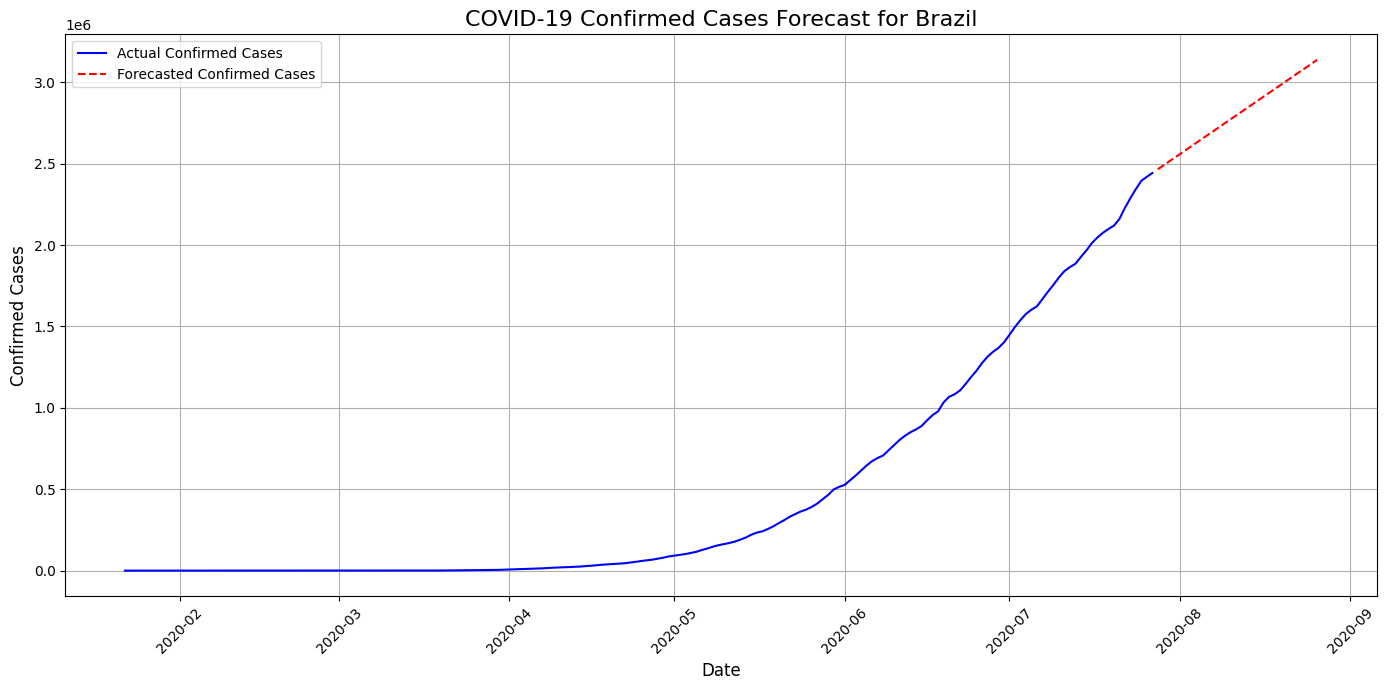

In [23]:

brazil_data = covid_data[covid_data['Country/Region'] == 'Brazil']

# Aggregate confirmed cases by Date (assuming data is daily)
brazil_data = brazil_data.groupby('Date')['Confirmed'].sum().reset_index()

# Set 'Date' as the index
brazil_data.set_index('Date', inplace=True)

# Fit the Exponential Smoothing model
model = ExponentialSmoothing(brazil_data['Confirmed'], trend='add', seasonal=None, seasonal_periods=None)
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(30)

# Plot the actual data and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(brazil_data.index, brazil_data['Confirmed'], label='Actual Confirmed Cases', color='blue')
plt.plot(forecast.index, forecast, label='Forecasted Confirmed Cases', color='red', linestyle='--')

# Customize the plot
plt.title('COVID-19 Confirmed Cases Forecast for Brazil', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


## HeatMap Visualization

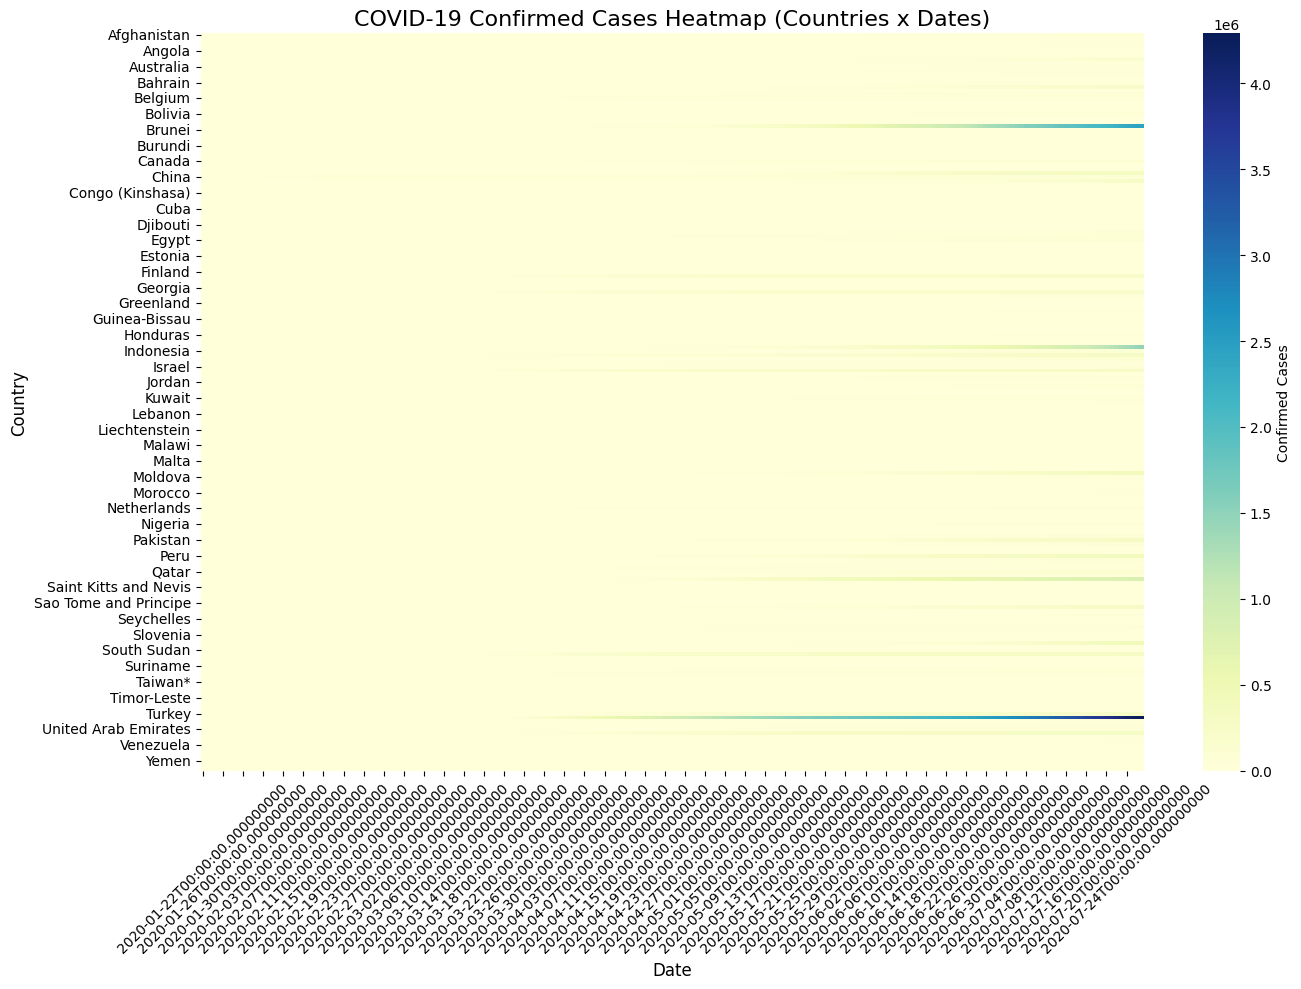

In [318]:

heatmap_data = covid_data.pivot_table(index='Country/Region', columns='Date', values='Confirmed', aggfunc='sum')

# Set the size of the heatmap plot
plt.figure(figsize=(14, 10))

# Create the heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Confirmed Cases'}, annot=False, fmt='g')

# Customize the plot
plt.title('COVID-19 Confirmed Cases Heatmap (Countries x Dates)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Pearson Correlation between Confirmed cases and Recovered cases: 0.9821011136360913


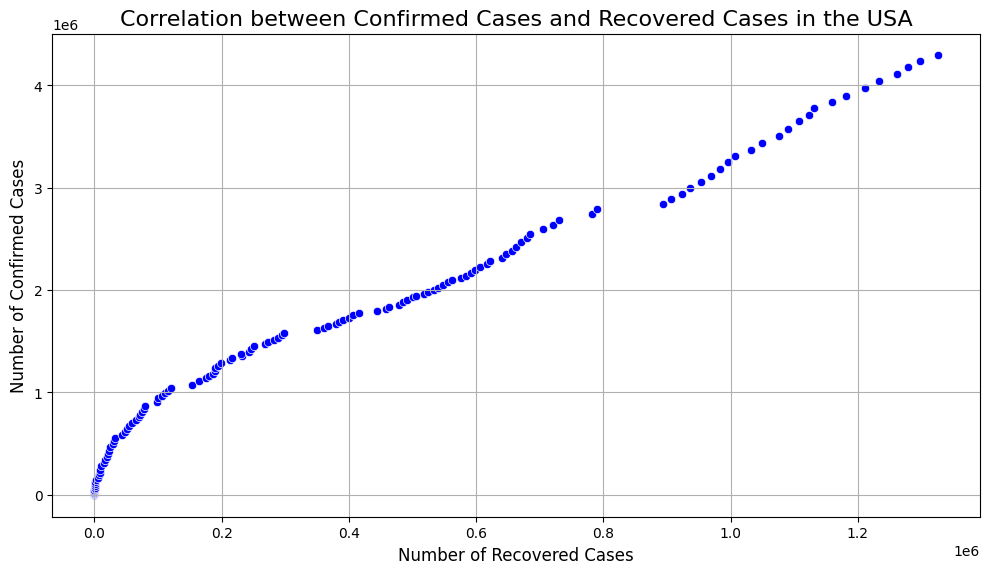

In [327]:

usa_data = covid_data[covid_data['Country/Region'] == 'US']

# Calculate the Pearson correlation between Confirmed cases and Recovered cases
correlation = usa_data['Confirmed'].corr(usa_data['Recovered'])

# Print the correlation coefficient
print(f"Pearson Correlation between Confirmed cases and Recovered cases: {correlation}")

# Optional: Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=usa_data['Recovered'], y=usa_data['Confirmed'], color='blue')
plt.title('Correlation between Confirmed Cases and Recovered Cases in the USA', fontsize=16)
plt.xlabel('Number of Recovered Cases', fontsize=12)
plt.ylabel('Number of Confirmed Cases', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
